函数1：如何求大气段的体积

In [1]:
from scipy import integrate
import math

# 输入各种参数
b_len = float(input("下底边(长边)的长度是："))
l_angel = int(input("图像左侧液体夹角是："))
l_pro_len = float(input("图像左侧斜边在长边的投影是："))
r_angel = int(input("图像右侧液体夹角是："))
r_pro_len = float(input("图像右侧斜边在长边的投影是："))

# 根据角度求tan值
l_tan = math.tan(math.radians(l_angel))
r_tan = math.tan(math.radians(r_angel))

# 管壁半径为2.5cm
r = 2.5

# 实现分段函数
def f(x):
    # 气段前端的坡
    if 0 < x <= (l_pro_len):
        return x * l_tan
    # 气段中段的平坡
    elif (l_pro_len) < x < (b_len - r_pro_len):
        return (l_tan * l_pro_len + r_tan * r_pro_len)/2
    # 气段尾端的坡
    elif x >= (b_len - r_pro_len):
        return (b_len-x)*r_tan

# 给定f(x)如何求积分对应的面积
def S(x):
    d = r - float(f(x)) #当前x左边对应于管壁上方的距离

    # 求气段两端点相对于圆心的夹角
    angle_rad = 2 * math.acos(d / r)

    # 扇形的面积
    hu_size = (angle_rad/2) * (r ** 2) # 约去一个pi

    # 三角形的面积（圆心和两端点连线组成的三角形）
    san_size = d * math.sqrt(r**2 - d**2)

    return hu_size-san_size

# 从0到b_len求s函数的积分
V,err= integrate.quad(S,0,b_len)
ml = V
L = ml/1000

print("大气段的体积是：",ml,"ml")
print("大气段的体积是：",L,"L")

l_tan 0.6008606190275604
r_tan 0.2867453857588079
大气段的体积是： 881.5223988478168 ml
大气段的体积是： 0.8815223988478168 L


## 绘制f(x)的图像

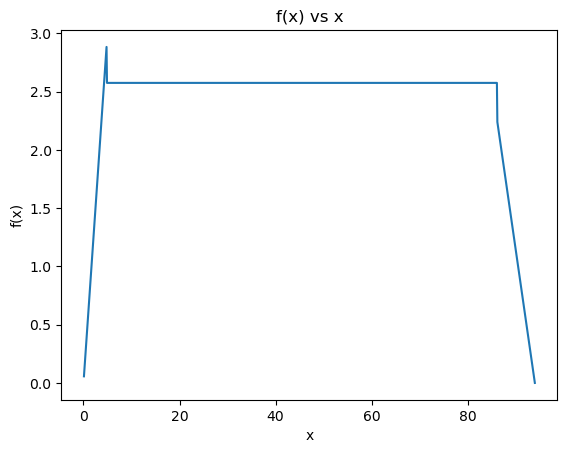

In [2]:
from scipy import integrate
import math
import matplotlib.pyplot as plt
import numpy as np

# 输入各种参数
b_len = float(input("下底边(长边)的长度是："))
l_angel = int(input("图像左侧液体夹角是："))
l_pro_len = float(input("图像左侧斜边在长边的投影是："))
r_angel = int(input("图像右侧液体夹角是："))
r_pro_len = float(input("图像右侧斜边在长边的投影是："))

# 根据角度求tan值
l_tan = math.tan(math.radians(l_angel))
r_tan = math.tan(math.radians(r_angel))

# 管壁半径为2.5cm
r = 2.5

# 实现分段函数
def f(x):
    # 气段前端的坡
    if 0 < x <= (l_pro_len):
        return x * l_tan
    # 气段中段的平坡
    elif (l_pro_len) < x < (b_len - r_pro_len):
        return (l_tan * l_pro_len + r_tan * r_pro_len)/2
    # 气段尾端的坡
    elif x >= (b_len - r_pro_len):
        return (b_len-x)*r_tan

# 给定f(x)如何求积分对应的面积
def S(x):
    d = r - float(f(x)) #当前x左边对应于管壁上方的距离

    # 求气段两端点相对于圆心的夹角
    angle_rad = 2 * math.acos(d / r)

    # 扇形的面积
    hu_size = (angle_rad/2) * (r ** 2) # 约去一个pi

    # 三角形的面积（圆心和两端点连线组成的三角形）
    san_size = d * math.sqrt(r**2 - d**2)

    return hu_size-san_size

# 从0到b_len创建一个连续的x值数组
x_values = np.linspace(0, b_len, 1000)

# 计算对应的S(x)值
S_values = [f(x) for x in x_values]

# 绘制S(x)随x的变化曲线
plt.plot(x_values, S_values)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) vs x')
plt.show()